## Predicting Dow Jones Index From News Headlines

### Problem Statement: Can we forecast movement of market based on the everyday sentiment of people?

### Setting Up the Notebook

#### Import essential libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read data from csv file

In [ ]:
df = pd.read_csv("C:/Users/HP/Documents/Jupyter Notebook/Combined_News_DJIA.csv")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

#### Overview of features

In [ ]:
df.info()
shape = df.shape
print(shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

#### Making sense of data


The dataset contains 27 columns and about 2000 of entries. All of the columns, including the date column, are string objects, with the only exception of the label being integers.

Values of the label are either 1 or 0, in which 1 indicates gain in the market and 0 indicates fall in the market. Here, all the 25 columns of individual news headline for a given date are the independent variables.

Let's see if there is any effect of news on the day to day stock market movement.

### Data Preparation

#### Check for null values

In [ ]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

Things are looking good.
The dataset is very complete and clean.

#### Fixing null values

In [ ]:
df = df.replace(np.nan, ' ', regex=True)
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

The null values are replaced with empty string.
Alternatively, the entire rows can be dropped.

#### Checking the distribution of classes

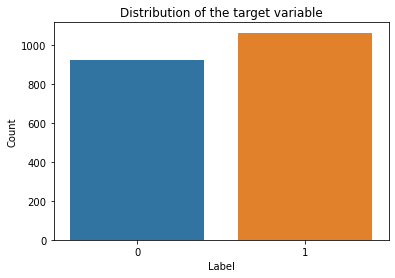

In [ ]:
sns.countplot(x='Label', data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of the target variable')
plt.show()

The dataset is distributed quite evenly, and thus balancing is not necessary.

#### Splitting the dataset

In [ ]:
#Create new subsets of dataframe
df_train = df[df['Date'] < '20150101']
df_test = df[df['Date'] > '20141231']

Since this is a time series problem, we will use the history to predict the recent past. Data prior to 2015 will be set as the training set and the rest will be the test set.

### Data Cleaning

#### Import libraries for text cleaning

In [ ]:
import nltk
import string
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We will do the cleaning step and step to see the gradual changes.

#### Punctuation removal

In [ ]:
#Create new dataframe of just the headlines
data_train = df_train.iloc[:,2:27]
data_test = df_test.iloc[:,2:27]

#Find the punctuations in all columns and replace them with empty string
data_train.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
data_test.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

print(data_train.iloc[5,3])

b The Italian government has lashed out at an influential Catholic magazine which suggested fascism might be resurfacing within the government  


Quotation marks and commas are no longer there.

#### Convert to lowercase

In [ ]:
#Turn every columns into lower case
for col in data_train.columns:
    data_train[col] = data_train[col].str.lower()

for col in data_test.columns:
    data_test[col] = data_test[col].str.lower()

print(data_train.iloc[5,3])

b the italian government has lashed out at an influential catholic magazine which suggested fascism might be resurfacing within the government  


The fisrt letter of 'Italian' and 'Catholic' are no longer capitalized.

#### Stopwords removal

In [ ]:
#Loop through the text word by word
#Remove any words that match the stopwords found in nltk library
#Join the remaining words together
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(words)

for col in data_train.columns:
    data_train[col] = data_train[col].apply(lambda x: remove_stopwords(x) if type(x) == str else x)

for col in data_test.columns:
    data_test[col] = data_test[col].apply(lambda x: remove_stopwords(x) if type(x) == str else x)

print(data_train.iloc[5,3])

b italian government lashed influential catholic magazine suggested fascism might resurfacing within government


Words like 'out', 'at' and 'an' are no longer there.

#### Join all the headlines into a single string

In [ ]:
#Iterate through every row, grouping all the columns of text then putting the group into a list
headlines_train = []
headlines_test = []

for i in range(len(data_train.index)):
    headlines_train.append(' '.join(str(x) for x in data_train.iloc[i, :]))

for i in range(len(data_test.index)):
    headlines_test.append(' '.join(str(x) for x in data_test.iloc[i, :]))

print(len(headlines_train))
print(len(headlines_test))

1863
378


1863 days of data for training set and 378 days of data for testing set.

#### Remove single letter words

In [ ]:
#Check the combined text and remove any single letter words
clean_headlines_train = []
clean_headlines_test = []

for headline in headlines_train:
    headline = re.sub(r"\b[a-zA-Z]\b", "", headline)
    clean_headlines_train.append(headline)

for headline in headlines_test:
    headline = re.sub(r"\b[a-zA-Z]\b", "", headline)
    clean_headlines_test.append(headline)

clean_headlines_train[2]

' remember adorable year old sang opening ceremonies fake  russia ends georgia operation  sexual harassment would children  al qa eda losing support iraq brutal crackdown activities regards un islamic including women buying cucumbers  ceasefire georgia putin outmaneuvers west  microsoft intel tried kill xo laptop  stratfor russo georgian war balance power  trying get sense whole georgia russia war vote think georgia started think russia  us military surprised timing swiftness russian military move south ossetia still trying sort happened us defense official said monday   beats war drum iran dumps dollar  gorbachev georgian military attacked south ossetian capital tskhinvali multiple rocket launchers designed devastate large areas  cnn use footage tskhinvali ruins cover georgian report video  beginning war olympics opening violates ancient tradition truce conflict games ioc could respond taking games away russia  pyramids large luxor stacked mega city pyramid tokyo bay  top party cities

The b tags and short forms of had ('d) are no longer there.

#### Lemmatization

In [ ]:
#Run through the text and lemmatize word by word
lemmatized_train = []
lemmatized_test = []

for headline in clean_headlines_train:
    text = [WordNetLemmatizer().lemmatize(word) for word in headline]
    lemmatized_train.append(''.join(text))

for headline in clean_headlines_test:
    text = [WordNetLemmatizer().lemmatize(word) for word in headline]
    lemmatized_test.append(''.join(text))

lemmatized_train[2]

' remember adorable year old sang opening ceremonies fake  russia ends georgia operation  sexual harassment would children  al qa eda losing support iraq brutal crackdown activities regards un islamic including women buying cucumbers  ceasefire georgia putin outmaneuvers west  microsoft intel tried kill xo laptop  stratfor russo georgian war balance power  trying get sense whole georgia russia war vote think georgia started think russia  us military surprised timing swiftness russian military move south ossetia still trying sort happened us defense official said monday   beats war drum iran dumps dollar  gorbachev georgian military attacked south ossetian capital tskhinvali multiple rocket launchers designed devastate large areas  cnn use footage tskhinvali ruins cover georgian report video  beginning war olympics opening violates ancient tradition truce conflict games ioc could respond taking games away russia  pyramids large luxor stacked mega city pyramid tokyo bay  top party cities

Lemmatization is different from stemming as it considers the meaning and does not convert words to root form by just removing the last characters. Thus, not much changes can be seen here.

### Exploratory Data Analysis

#### See the bigger picture with wordcloud

In [ ]:
from wordcloud import WordCloud
all_train = ''
all_test = ''

#Join everything into a single string
for headline in lemmatized_train:
    all_train += ''.join(headline)

for headline in lemmatized_test:
    all_test += ''.join(headline)

print(len(all_train))
print(len(all_test))

3950303
832812


Word count for training set is about 4m and word count for testing set is about 800k.

#### Wordcloud for training data

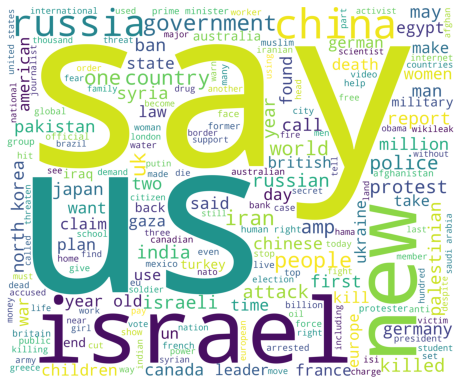

In [ ]:
wordcloud_train = WordCloud(background_color='white', width=3000, height=2500).generate(all_train)
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_train)
plt.axis('off')
plt.show()

We can see that countries' name are among the most frequent words.

#### Workcloud for testing data

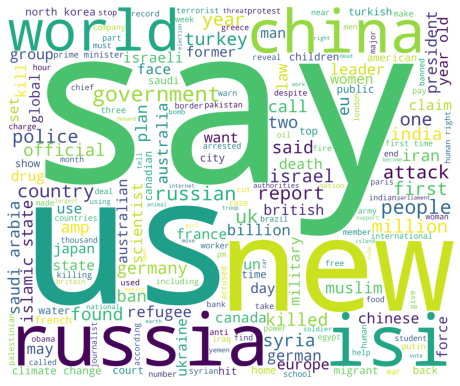

In [ ]:
wordcloud_test = WordCloud(background_color='white', width=3000, height=2500).generate(all_test)
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_test)
plt.axis('off')
plt.show()

Same thing can be seen here. Even the same few countries.

We can thus say that the news trend has stayed relatively same throughout the years.

#### A more detailed look at the numbers

In [ ]:
from collections import Counter

#Tokenize the text
tokens_train = nltk.word_tokenize(all_train)
tokens_test = nltk.word_tokenize(all_test)

#Count the occurences of each token
counter_train = Counter(tokens_train)
counter_test = Counter(tokens_test)

#### Draw a count plot

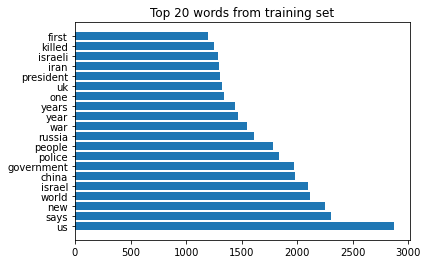

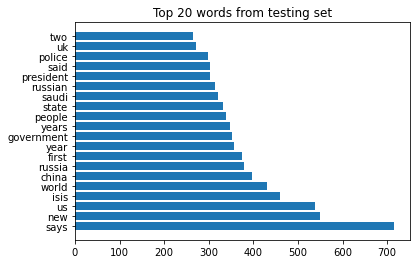

In [ ]:
c_train = np.array(counter_train.most_common(20))
c_test = np.array(counter_test.most_common(20))

plt.barh(c_train[:, 0], c_train[:, 1].astype('int'))
plt.title("Top 20 words from training set")
plt.show()

plt.barh(c_test[:, 0], c_test[:, 1].astype('int'))
plt.title("Top 20 words from testing set")
plt.show()

Apart from countries' name, words commonly used in news articles such as 'government', 'world' and 'people' are also found frequently in our dataset

### Data Preprocessing

#### Import libraries for text transformation and metrics calculation for classification

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

We are going to use both count-vectorizer and tfidf-vectorizer to create one dataset for each vectorizer. Then, the vectorized dataset is used to build a logistic regression model which will then be compared side by side using the confusion matrix.

#### Utility function to generate metrics report

In [ ]:
def cal_score(labels, predictions):
    matrix=confusion_matrix(labels, predictions)
    print(matrix)
    score=accuracy_score(labels, predictions)
    print(score)
    report=classification_report(labels, predictions)
    print(report)

Start with the basic first, that is just counting the frequency of each word

#### Bag-of-words using counts

In [ ]:
bow_count_vectorizer = CountVectorizer()
bow_train1 = bow_count_vectorizer.fit_transform(lemmatized_train)
bow_test1 = bow_count_vectorizer.transform(lemmatized_test)

bow_model1 = LogisticRegression(solver='lbfgs', max_iter=1000)
bow_model1 = bow_model1.fit(bow_train1, df_train["Label"])
predictions = bow_model1.predict(bow_test1)
cal_score(df_test["Label"], predictions)

[[151  35]
 [ 28 164]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       186
           1       0.82      0.85      0.84       192

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378



#### Bag-of-words using tfidf

In [ ]:
bow_tfidf_vectorizer = TfidfVectorizer()
bow_train2 = bow_tfidf_vectorizer.fit_transform(lemmatized_train)
bow_test2 = bow_tfidf_vectorizer.transform(lemmatized_test)

bow_model2 = LogisticRegression(solver='lbfgs', max_iter=1000)
bow_model2 = bow_model2.fit(bow_train1, df_train["Label"])
predictions = bow_model2.predict(bow_test2)
cal_score(df_test["Label"], predictions)

[[154  32]
 [ 37 155]]
0.8174603174603174
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       186
           1       0.83      0.81      0.82       192

    accuracy                           0.82       378
   macro avg       0.82      0.82      0.82       378
weighted avg       0.82      0.82      0.82       378



The accuracy turns out good for the first try. Count vectorizer performs better but just very slightly.

Next comes the n-gram, which means counting the frequency of sequence of words. 2-gram means the sequence is 2-words long.

N-gram is similar to the bag-of-words method, also known as unigram, by extending it from a single word to a sequence of n words.  

#### 2-gram using counts

In [ ]:
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2))
bigram_train1 = bigram_count_vectorizer.fit_transform(lemmatized_train)
bigram_test1 = bigram_count_vectorizer.transform(lemmatized_test)

bigram_model1 = LogisticRegression(solver='lbfgs', max_iter=1000)
bigram_model1 = bigram_model1.fit(bigram_train1, df_train["Label"])
predictions = bigram_model1.predict(bigram_test1)
cal_score(df_test["Label"], predictions)

[[143  43]
 [ 17 175]]
0.8412698412698413
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       186
           1       0.80      0.91      0.85       192

    accuracy                           0.84       378
   macro avg       0.85      0.84      0.84       378
weighted avg       0.85      0.84      0.84       378



#### 2-gram using tfidf

In [ ]:
bigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2))
bigram_train2 = bigram_tfidf_vectorizer.fit_transform(lemmatized_train)
bigram_test2 = bigram_tfidf_vectorizer.transform(lemmatized_test)

bigram_model2 = LogisticRegression(solver='lbfgs', max_iter=1000)
bigram_model2 = bigram_model2.fit(bigram_train2, df_train["Label"])
predictions = bigram_model2.predict(bigram_test2)
cal_score(df_test["Label"], predictions)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



Using bigram, it is found that tfidf vectorizer performs better and is able to achieve 0 false negative. However, the accuracy for both only increases by a small margin.

Then, tune it up again to trigram to see if we have reached the optimum threshold.

#### 3-gram using counts

In [ ]:
trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3))
trigram_train1 = trigram_count_vectorizer.fit_transform(lemmatized_train)
trigram_test1 = trigram_count_vectorizer.transform(lemmatized_test)

trigram_model1 = LogisticRegression(solver='lbfgs', max_iter=1000)
trigram_model1 = trigram_model1.fit(trigram_train1, df_train["Label"])
predictions = trigram_model1.predict(trigram_test1)
cal_score(df_test["Label"], predictions)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



#### 3-gram using tfidf

In [ ]:
trigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(3,3))
trigram_train2 = trigram_tfidf_vectorizer.fit_transform(lemmatized_train)
trigram_test2 = trigram_tfidf_vectorizer.transform(lemmatized_test)

trigram_model2 = LogisticRegression(solver='lbfgs', max_iter=1000)
trigram_model2 = trigram_model2.fit(trigram_train2, df_train["Label"])
predictions = trigram_model2.predict(trigram_test2)
cal_score(df_test["Label"], predictions)

[[130  56]
 [  0 192]]
0.8518518518518519
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



The performace for both is the same here. Not only that, trigram tfidf also gives the same results as bigram tfidf. Thus, bigram tfidf might be the most optimum way to do the preprocessing.

### Model Building and Evaluation

#### Import libarries for creating various classification models and evaluating the models created

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

From the ROC curve, we can get a better understanding of the models as it tells us the overall behavior of the classifier.

For the 5 different algorithms, we will build a model each. Then, plot the ROC curves of all 5 models in the same graph to do further comparison.

#### Initialize the models and their names respectively

In [ ]:
models = [MultinomialNB(),
          KNeighborsClassifier(3),
          DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators=200,criterion='entropy'),
          LogisticRegression(solver='lbfgs', max_iter=1000)]

model_names=['Naive Bayes','K-Nearest Neighbor','Decision Tree','Random Forest','Logistic Regression']

pred_proba = []

#### Build models using 2-gram tfidf

In [ ]:
#Create new variables for model building
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2))
X_train = tfidf_vectorizer.fit_transform(lemmatized_train)
X_test = tfidf_vectorizer.transform(lemmatized_test)
Y_train = df_train['Label']
Y_test = df_test['Label']

#Generate a model using each algorithm and store the probability result into a list
for model in models:
    model.fit(X_train, Y_train)
    pred_proba.append(model.predict_proba(X_test))

#### Get the scores

In [ ]:
#Calculate the false-positive rates, true-positive rates and the thresholds from the probabilty
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_proba[0][:,1], pos_label=1)
fpr2, tpr2, thresh1 = roc_curve(Y_test, pred_proba[1][:,1], pos_label=1)
fpr3, tpr3, thresh1 = roc_curve(Y_test, pred_proba[2][:,1], pos_label=1)
fpr4, tpr4, thresh1 = roc_curve(Y_test, pred_proba[3][:,1], pos_label=1)
fpr5, tpr5, thresh1 = roc_curve(Y_test, pred_proba[4][:,1], pos_label=1)

#Calculate also for 0.5 accuracy (false-positive rates=true-positive rates)
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

#### Plot the graph and check the performance

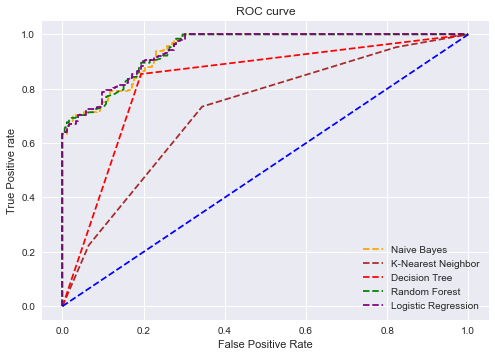

In [ ]:
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=model_names[0])
plt.plot(fpr2, tpr2, linestyle='--',color='brown', label=model_names[1])
plt.plot(fpr3, tpr3, linestyle='--',color='red', label=model_names[2])
plt.plot(fpr4, tpr4, linestyle='--',color='green', label=model_names[3])
plt.plot(fpr5, tpr5, linestyle='--',color='purple', label=model_names[4])
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

The best performers are Naive-Bayes, Logistic Regression and Random Forest and the performance is very similar as seen from their curves that sit very closely on top of each other.

On the other hand, K-Nearest Neighbor and Decision Tree both have a very clear optimum threshold.

Last but not least, also find out whether there is change in the performance of a model when using bigram count vectorizer.

#### Build models using 2-gram counts

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(2,2))
X_train = count_vectorizer.fit_transform(lemmatized_train)
X_test = count_vectorizer.transform(lemmatized_test)
Y_train = df_train['Label']
Y_test = df_test['Label']

for model in models:
    model.fit(X_train, Y_train)
    pred_proba.append(model.predict_proba(X_test))

#### Get the scores

In [ ]:
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_proba[5][:,1], pos_label=1)
fpr2, tpr2, thresh1 = roc_curve(Y_test, pred_proba[6][:,1], pos_label=1)
fpr3, tpr3, thresh1 = roc_curve(Y_test, pred_proba[7][:,1], pos_label=1)
fpr4, tpr4, thresh1 = roc_curve(Y_test, pred_proba[8][:,1], pos_label=1)
fpr5, tpr5, thresh1 = roc_curve(Y_test, pred_proba[9][:,1], pos_label=1)

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

#### Plot a graph and check the performance

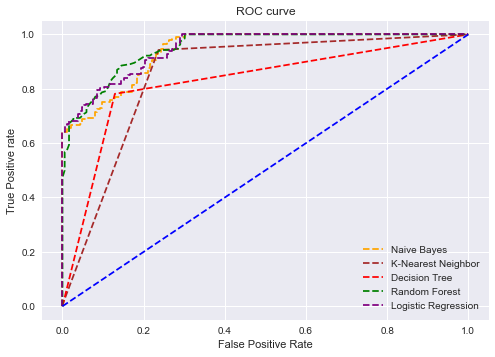

In [ ]:
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=model_names[0])
plt.plot(fpr2, tpr2, linestyle='--',color='brown', label=model_names[1])
plt.plot(fpr3, tpr3, linestyle='--',color='red', label=model_names[2])
plt.plot(fpr4, tpr4, linestyle='--',color='green', label=model_names[3])
plt.plot(fpr5, tpr5, linestyle='--',color='purple', label=model_names[4])
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

The results are very similar to the previous. Again, Naive-Bayes, Random Forest and Logistic Regression perform the best.

Interestingly, K-Nearest Neighbor's gives a much better result whereas Decision Tree does not seem to improve or worsen by much.

### Summary

Overall, all of the models are able achieve good results. In our study, the Logistic Regression performs just as good as the more advanced models that are often expected to give excellent results such as Naive-Bayes and Random Forest. This could be due to the fact that this is binary classification problem and Logistic Regression fits very well under such circumstance.

Besides that, it is also found that Count-Vectorizer and TFIDF-Vectorizer work equally well for our case. Both these text processing methods produce an accuracy of over 80% even without using n-gram despite not being mathematically advanced like the other methods such as Word2Vec and BERT.

In conclusion, these models are ready to be deployed and tested in the real world. Further study is still however required to determine the best cutoff point, whether to have a higher false positive rate in exchage for a lower false negative rate, or to have a higher false negative rate in exchange for a lower false positive rate.